# Introduction.

Realm of the mad god (ROTMG for short) is a permadeath bullet-hell mmorpg. The purpose of this notebook is to analyze player deaths and find various patterns behind them

## Table of Contents:
 
○ Ask questions

○ Explore data

○ Conclude


 

# Ask Questions:

1. Which enemies caused the most deaths?
2. What dates do people die on the most?
3. What day of the week has the most deaths?
4. How many ring of decades have been lost?
5. What are among the highest amounts of base and total fame people die with?
6. Are deaths higher amongst those who wear backpacks or don't?
7. Does the tier of your weapon, secondary and armour have any correlation with reduced deaths?


# Explore Data

In [1]:
import pandas as pd

df = pd.read_csv("deaths.csv")
df

,id,user,datetime,base_fame,total_fame,weapon,secondary,armour,ring,backpack,maxed_stats,killed_by
0,1,DeftUzi,2020-08-24 18:04:14.000000,385,567,Warlord Wand UT,Tome of Holy Guidance T6,Robe of the Star Mother T14,Bloodshed Ring UT,1,6,Oryx the Mad God 3
1,2,Ashleysgir,2020-08-24 18:02:02.000000,0,0,Golden Bow T8,Novice's Lute T0,Empty slot,Empty slot,0,0,Undead Hobbit Mage
2,3,LordLabia,2020-08-24 18:00:57.000000,44,48,Empty slot,Empty slot,Empty slot,Empty slot,0,1,Sprite God
3,4,Josutoki,2020-08-24 18:00:28.000000,3419,9177,Wand of the Fallen UT,Scepter of Devastation UT,Robe of the Star Mother T14,Ring of Decades UT,1,8,O3C Portal Defensive
4,5,Contagion,2020-08-24 17:59:32.000000,323,480,Dagger of Foul Malevolence T12,Decoy Prism T0,Hydra Skin Armor T13,Ring of Exalted Health T5,1,6,O3C Counter Boundary Creator
...,...,...,...,...,...,...,...,...,...,...,...,...
139831,139832,Fundipy,2020-10-07 18:32:35.000000,8,8,Golden Sword T7,Golden Helm T5,Golden Chainmail T5,Empty slot,0,0,Ruins Lamp
139832,139833,Caspergay,2020-10-07 18:32:32.000000,21,21,Emeraldshard Dagger T10,Decoy Prism T0,Basilisk Hide Armor T3,Ring of Wisdom T1,0,0,Stheno the Snake Queen
139833,139834,Crezero,2020-10-07 18:31:40.000000,805,1257,Staff of Necrotic Arcana T9,Lifedrinker Skull T5,Anointed Robe UT,Ring of Pagan Favor UT,0,2,Library Corruption Phantom
139834,139835,SuckFean,2020-10-07 18:31:33.000000,391,652,Staff of Astral Knowledge T11,Elemental Detonation Spell T6,Robe of the Grand Sorcerer T13,Ring of Paramount Health T4,0,7,LH Champion of Oryx


In [2]:
#Check for any NaN values
df1 = df[df.isna().any(axis=1)]
df1

,id,user,datetime,base_fame,total_fame,weapon,secondary,armour,ring,backpack,maxed_stats,killed_by


In [3]:
#Filter Dupes (If any)
duplicatesNum = df.duplicated().sum()
duplicatesNum

0

In [4]:
user_deaths = df.groupby(by=["killed_by"]).count()
user_deaths = user_deaths.drop(columns=['id','datetime','base_fame','total_fame','weapon','secondary','armour','ring','backpack','maxed_stats'])
user_deaths = user_deaths.rename(columns={"user":"Users"})
user_deaths = user_deaths.sort_values(by =["Users"],ascending = False)
user_deaths = user_deaths.reset_index()
user_deaths.head(50)


,killed_by,Users
0,Medusa,5043
1,Oryx the Mad God 3,4105
2,Lava,3689
3,Ghost God,2740
4,Oryx the Mad God 2,2553
5,The Keyper,2376
6,EH King Bee,2368
7,O3 Oryx Portal,1739
8,Leviathan,1698
9,Davy Jones,1597


We see that the majority of player deaths is caused by the medusa enemy in the godlands. The godlands is a fairly dangerous place, and especially fatal to new players. Almost all the deaths are primarily from such gods in the godlands. Naturally, dangerous dungeons such as the shatters and lost halls also have high death rates. Global events such as the keyper and Bees are also another major cause of deaths. 

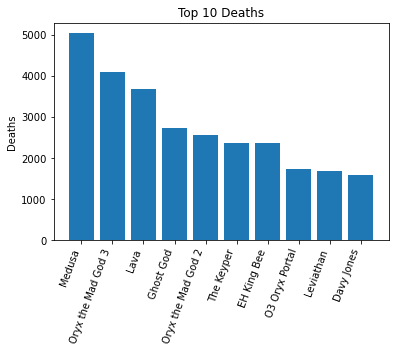

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
x = []
y = []
for enemy in range(10):
    x.append(user_deaths["killed_by"][enemy])
for death in range(10):
    y.append(user_deaths["Users"][death])
plt.xticks(rotation=70, ha='right')
plt.bar(x,y)
plt.ylabel("Deaths")
plt.title("Top 10 Deaths")
plt.show()

### Remark:
Oryx 3 was released on 22/06/20 and in such a short time a lot of the player deaths accumalated from this boss


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
x = []
y = []
for enemy in range(len(user_deaths)):
    if user_deaths["Users"][enemy] > 1000:
        x.append(user_deaths["killed_by"][enemy])
for death in range(len(user_deaths)):
    if user_deaths["Users"][death] > 1000:
        y.append(user_deaths["Users"][death])


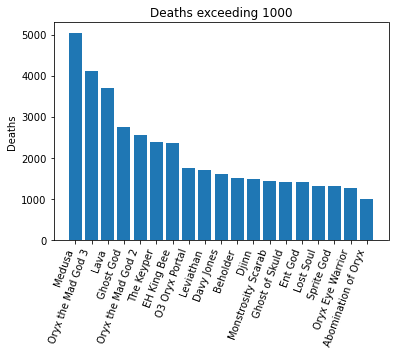

In [7]:
plt.xticks(rotation=70, ha='right')
plt.bar(x,y)
plt.ylabel("Deaths")
plt.title("Deaths exceeding 1000")
plt.show()

In [8]:
import datetime

# this line converts the string object in Timestamp object
df["datetime"] = [datetime.datetime.strptime(str(d), "%Y-%m-%d %H:%M:%S.%f") for d in df["datetime"]]

# extracting date from timestamp

date = [datetime.datetime.date(d) for d in df['datetime']] 

# extracting time from timestamp
time = [datetime.datetime.time(d) for d in df['datetime']]

df["date"] = date
df["time"] = time

In [9]:
death_by_date = df
death_by_date = death_by_date.drop(columns=['id','datetime','ring','killed_by','base_fame','total_fame','weapon','secondary','armour','backpack','maxed_stats'])
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
death_by_date["day"] = death_by_date["date"].apply(lambda date: weekdays[date.weekday()])
death_by_date

,user,date,time,day
0,DeftUzi,2020-08-24,18:04:14,Monday
1,Ashleysgir,2020-08-24,18:02:02,Monday
2,LordLabia,2020-08-24,18:00:57,Monday
3,Josutoki,2020-08-24,18:00:28,Monday
4,Contagion,2020-08-24,17:59:32,Monday
...,...,...,...,...
139831,Fundipy,2020-10-07,18:32:35,Wednesday
139832,Caspergay,2020-10-07,18:32:32,Wednesday
139833,Crezero,2020-10-07,18:31:40,Wednesday
139834,SuckFean,2020-10-07,18:31:33,Wednesday


In [10]:
death_by_day = death_by_date.groupby(by = 'day').count()
death_by_day = death_by_day.drop(columns=['date','time'])
death_by_day = death_by_day.sort_values(by =["user"],ascending = False)
death_by_day = death_by_day.rename(columns={"user":"Deaths"})
death_by_day


,Deaths
day,
Tuesday,33822
Wednesday,24265
Monday,22590
Sunday,15949
Friday,15426
Saturday,13918
Thursday,13866


In [11]:
common_dates = df.groupby(by = 'date').count()
common_dates = common_dates.drop(columns=['ring','datetime','id','backpack','maxed_stats','base_fame','total_fame','weapon','secondary','armour','time','killed_by'])
common_dates = common_dates.rename(columns={"user":"Users"})
common_dates= common_dates.sort_values(by =["Users"],ascending = False)

common_dates.head(10)


,Users
date,
2020-09-15,9920
2020-10-05,5578
2020-09-11,5303
2020-09-25,5240
2020-09-26,5227
2020-09-09,5208
2020-10-06,5200
2020-09-28,5198
2020-09-14,5156


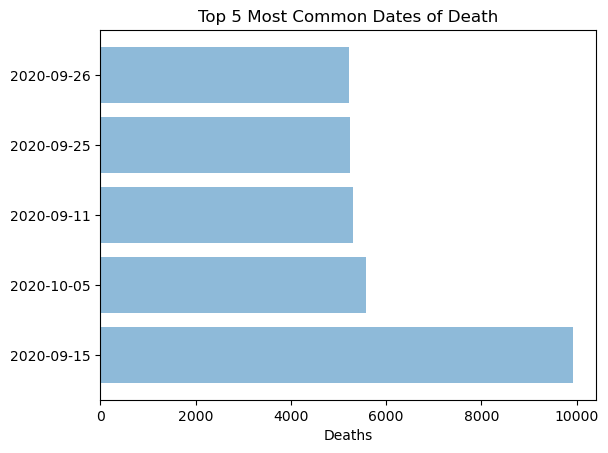

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np



objects = ('2020-09-15','2020-10-05','2020-09-11','2020-09-25','2020-09-26')
y_pos = np.arange(len(objects))
deaths = [9920,5578,5303,5240,5227]

plt.barh(y_pos, deaths, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths')
plt.title('Top 5 Most Common Dates of Death')

plt.show()

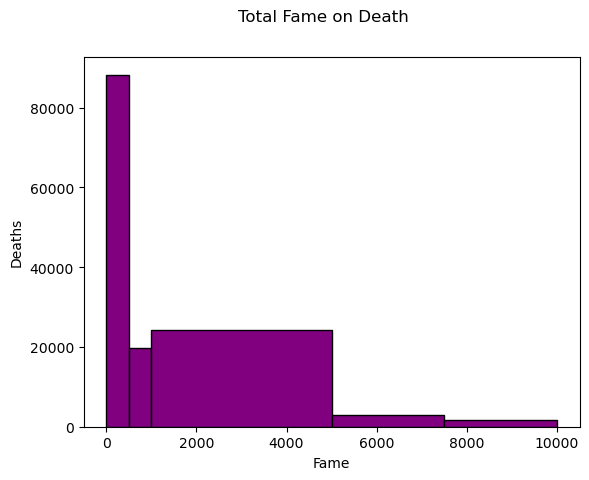

In [13]:
plt.hist(df['total_fame'],bins=[0,500,1000,5000,7500,10000],color = 'purple',edgecolor='black')
plt.xlabel('Fame')
plt.ylabel('Deaths')
plt.suptitle("Total Fame on Death")
plt.show()

In [14]:
total_fame = df.groupby(by = 'total_fame').count()
total_fame = total_fame.drop(columns=['id','datetime','base_fame','weapon','secondary','armour','ring','backpack','maxed_stats','killed_by','date','time'])
total_fame = total_fame.sort_values(by =["total_fame"],ascending = False)
total_fame = total_fame.rename(columns={"user":"Users"})

total_fame.head(10)



,Users
total_fame,
326507,2
314933,8
301144,4
205067,4
183603,2
97219,2
96592,1
96513,1
92913,4


In [15]:
#Sort by total fame
top_fame = df.groupby(by = 'user').sum()
top_fame = top_fame.drop(columns=['id','backpack','maxed_stats'])
top_fame = top_fame.sort_values(by =["total_fame"],ascending = False)

top_fame.head(10)

,base_fame,total_fame
user,,
NoHaZ,403648,2519464
Hokivoke,215684,1204576
MaximBogda,362306,1196650
Heraldism,344946,953895
IEdvis,111799,695647
DailyKxrma,319596,673319
JS,303865,529914
Ponerecipi,176539,521411
DukOnWhack,177070,514610


In [16]:
#Sort by base fame
base_fame = df.groupby(by = 'user').sum()
base_fame = top_fame.sort_values(by =["base_fame"],ascending = False)
base_fame.head(10)


,base_fame,total_fame
user,,
NoHaZ,403648,2519464
MaximBogda,362306,1196650
Heraldism,344946,953895
DailyKxrma,319596,673319
JS,303865,529914
Hokivoke,215684,1204576
TORNIUD,200324,425343
DukOnWhack,177070,514610
Ponerecipi,176539,521411


### Remark:
Comparing the base fame to total fame on this table illustrates how significant fame multipliers are for your total fame.

In [17]:
gear_on_death = df.groupby(by = 'armour').count()
gear_on_death = gear_on_death.drop(columns=['date','time','id','datetime','user','base_fame','total_fame','weapon','secondary','ring','backpack','maxed_stats'])
gear_on_death = gear_on_death.rename(columns={"killed_by":"Dropped"})
gear_on_death = gear_on_death.sort_values(by =["Dropped"],ascending = False)
gear_on_death.head(10)


,Dropped
armour,
Empty slot,24382
Acropolis Armor T13,6422
Robe of the Grand Sorcerer T13,6173
Robe of the Star Mother T14,4533
Dominion Armor T14,4474
Hydra Skin Armor T13,4319
Robe of the Elder Warlock T12,3898
Wyrmhide Armor T14,3603
Abyssal Armor T12,3411


The majority of deaths are clearly from players who have worn no armour whatsoever. However it is interesting to see that those who wore highest 'tiered' armours are also sharing the spot amongst the highest deaths

In [18]:
rings_on_death = df.groupby(by = 'ring').count()
rings_on_death = rings_on_death.drop(columns=['date','time','id','datetime','user','base_fame','total_fame','weapon','secondary','armour','backpack','maxed_stats'])
rings_on_death = rings_on_death.rename(columns={"killed_by":"Dropped"})
rings_on_death = rings_on_death.sort_values(by = ["Dropped"],ascending = False)
rings_on_death.head(10)

,Dropped
ring,
Empty slot,27033
Ring of Exalted Health T5,14314
Ring of Paramount Health T4,12603
Ring of Decades UT,7130
Ring of Unbound Health T6,4729
Ring of Superior Health T3,4686
Ring of Health T1,3806
Experimental Ring UT,3384
Ring of the Pyramid UT,2976


What we see here is that the majority of deaths is from those who have worn nothing, similar to the above with armour. Furthermore all the rings amongst the top 10 deaths are health rings.

In [19]:
backpack_on_death = df.groupby(by = 'backpack').count()
backpack_on_death  = backpack_on_death.drop(columns=['date','time','ring','id','datetime','user','base_fame','total_fame','weapon','secondary','armour','maxed_stats'])
backpack_on_death = backpack_on_death.rename(columns={"killed_by":"On Death"})
backpack_on_death

,On Death
backpack,
0,91070
1,48766


In [20]:
stats_on_death = df.groupby(by = 'maxed_stats').count()
stats_on_death  = stats_on_death.drop(columns=['date','time','backpack','ring','id','datetime','user','base_fame','total_fame','weapon','secondary','armour'])
stats_on_death = stats_on_death.rename(columns={"killed_by":"On Death"})
stats_on_death

,On Death
maxed_stats,
0,84489
1,5247
2,4058
3,3430
4,4363
5,4116
6,6297
7,4864
8,22972


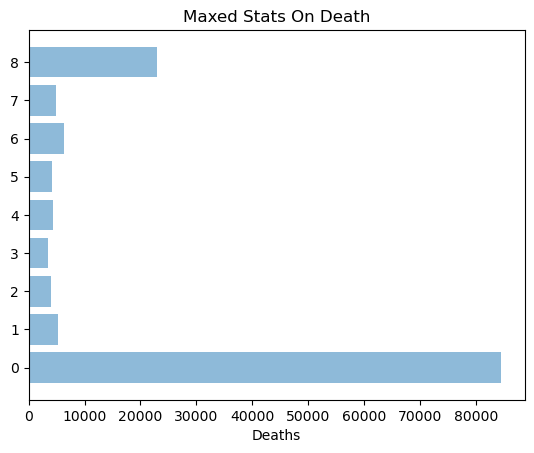

In [21]:
import matplotlib.pyplot as plt; plt.rcdefaults()



objects = ('0','1','2','3','4','5','6','7','8')
y_pos = np.arange(len(objects))
deaths = [84489,5247,4058,3430,4363,4116,6297,4864,22972]

plt.barh(y_pos, deaths, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths')
plt.title('Maxed Stats On Death')

plt.show()

The majority of deaths are from players with no stats maxed whatsoever. It is also interesting to see that the 2nd place is taken by those who have maxed all 8 stats.

In [22]:
weapon_on_death = weapon_on_death = df.groupby(by = 'weapon').count()
weapon_on_death  = weapon_on_death.drop(columns=['date','time','maxed_stats','backpack','ring','id','datetime','user','base_fame','total_fame','secondary','armour'])
weapon_on_death = weapon_on_death.rename(columns={"killed_by":"Dropped"})
weapon_on_death = weapon_on_death.sort_values(by = ["Dropped"],ascending = False)

weapon_on_death.head(20)

,Dropped
weapon,
Empty slot,6440
Staff of the Cosmic Whole T12,4680
Short Sword T0,4494
Sword of Acclaim T12,4387
Energy Staff T0,4110
Steel Dagger T0,3911
Dagger of Foul Malevolence T12,3677
Shortbow T0,3219
Wand of Recompense T12,2972


Following the same pattern as rings and armour. The majority of deaths are from players who have nothing equipped. Following this, the other majority of deaths are from players who wear either tier 0 or the higher tiered weapons. There are some mid-tier weapons at T6 in the mix as well.

In [23]:
special_on_death = special_on_death = df.groupby(by = 'secondary').count()
special_on_death  = special_on_death.drop(columns=['date','time','weapon','maxed_stats','backpack','ring','id','datetime','user','base_fame','total_fame','armour'])
special_on_death = special_on_death.rename(columns={"killed_by":"Dropped"})
special_on_death = special_on_death.sort_values(by = ["Dropped"],ascending = False)

special_on_death.head(30)

,Dropped
secondary,
Decoy Prism T0,8263
Empty slot,6667
Fire Spray Spell T0,4457
Novice's Lute T0,3566
Wooden Shield T0,3349
Combat Helm T0,2912
Seal of the Initiate T0,2821
Magic Quiver T0,2548
Seal of the Blessed Champion T6,2531


Interestingly enough the majority of deaths are from a T0 Decoy Prism. Following this are those with nothing equipped at all. This appears to break the pattern with other equipped items. But of course we still see that the top tiered items or T0 items are the most dropped upon death

In [24]:
#If this cell throws an error, run the individual cell again
death_by_class = special_on_death
death_by_class.reset_index(inplace = True) 
secondary_words = ["Tome","Merlot","Necronomicon","Scripture","Book of Geb" #Priest
    "Cnidaria Rod","Scepter", #sorc
    "Helm","Tricorne","Visage", #warrior
    "Shield","Buckler","Scutum","Oryx’s Escutcheon","Champion’s Bastion", # knight
     "Seal","Abyssal Insignia", # Paladin
     "Spell","Tablet","Scroll","Buster","Jade Storm", #wizard
     "Orb","Primal Arcana","Soul of the Bearer","Scorchium Stone", #mystic
     "Skull","Skullish Remains of Esben","Perennial Cranium","Cubic Frame","Memento Mori", #necro
     "Quiver","Archerang","Q.U.I.V.E.R.","Mad Javelin",#archer
     "Trap","Honeytomb Snare","Lifebringing Lotus","Painbow","Blacklight Artifice", #huntress
     "Cloak","Drape","Cape", #Rogue
     "Poison","Lightning in a Bottle","Mighty Stein","Toxin","Medusozoan","Venom","Parasitic Concoction", #Assasin
     "Gambler’s Fate","Prism","Brain of the Golem","Daevite Progenitor", #trickster
     "Wakizashi","Shadow Serpent Sidearm","Sentinel’s Sidearm","Ryu’s Blade","Watarimono","Amaterasu", #Samurai
     "Lute","Lullaby","Snake Charmer Pungi","Wavecrest Concertina","Pharaoh’s Requiem",
     "Noble Mandolin","Angel’s Fanfare","Oryxmas Carol","Chief’s War Horn",#Bard
     "Star","Shuriken","Circle","Hanagasaku","Star of Enlightenment",
     "Kageboshi","Daybreak Chakram","Crystalline Kunai","Rage Claws"#Ninja
    ]
death_by_class["secondary_word"] =  special_on_death["secondary"].apply(lambda x: ([option for option in secondary_words if option in x]+["NaN"])[0])
death_by_class = death_by_class = death_by_class.groupby(by = 'secondary_word').sum()


In [25]:
#If this cell throws an error, run the individual cell again

Class_Special = { "Priest":["Tome", "Merlot", "Necronomicon","Scripture", "Book of Geb"], 
"Sorcerer": ["Cnidaria Rod", "Scepter"], 
"Warrior": ["Helm", "Tricorne", "Visage"], 
"Knight":["Shield", "Buckler", "Scutum", "Oryx's Escutcheon", "Champion's Bastion"], 
"Paladin":["Seal", "Abyssal Insignia"], 
"Wizard": ["Spell","Tablet", "Scroll", "Buster", "Jade Storm"], 
"Mystic": ["Orb", "Primal Arcana", "Soul of the Bearer", "Scorchium Stone"], 
"Necromancer": ["Skull", "Skullish Remains of Esben", "Perennial Cranium","Cubic Frame", "Memento Mori"], 
"Archer": ["Quiver", "Archerang", "Q.U.I.V.E.R.", "Mad Javelin"], 
"Huntress":["Trap", "Honeytomb Snare", "Lifebringing Lotus","Painbow", "Blacklight Artifice"], 
"Rogue": ["Cloak", "Drape", "Cape"], 
"Assassin":["Poison", "Lightning in a Bottle", "Mighty Stein", "Toxin", "Medusozoan", "Venom", "Parasitic Concoction"],
"Trickster": ["Gambler's Fate", "Prism", "Brain of the Golem", "Daevite Progenitor"], 
"Samurai": ["Wakizashi", "Shadow Serpent Sidearm", "Sentinel's sidearm", "Ryu's Blade", "Watarimono", "Amaterasu"],
"Bard": ["Lute", "Lullaby", "Snake Charmer Pungi", "Wavecrest Concertina", "Pharaoh's Requiem",
"Noble Mandolin", "Angel's Fanfare", "Oryxmas Carol","Chief's War Horn"], 
"Ninja": ["Star","Shuriken", "Circle", "Hanagasaku", 
          "Star of Enlightenment","Kageboshi", "Daybreak Chakram", "Crystalline Kunai", "Rage Claws"] 
          } 
   
Classes = ["Priest","Sorcerer","Warrior","Knight","Paladin","Wizard","Mystic","Necromancer","Archer","Huntress","Rogue","Assassin","Trickster","Samurai","Bard","Ninja"]
Class = []
death_by_class.reset_index(inplace = True) 

In [26]:
death_by_class["Class"] = death_by_class["secondary_word"].apply(lambda x: ([c for c in Classes if x in Class_Special[c]]+["NaN"])[0])

In [27]:
death_by_class  = death_by_class.drop(columns=['secondary_word'])


In [28]:
death_by_class = death_by_class.groupby(by = ["Class"]).sum()
death_by_class = death_by_class.rename(columns={"Dropped":"Deaths"})
death_by_class = death_by_class.sort_values(by = ["Deaths"],ascending = False)
death_by_class = death_by_class.drop("NaN") #As we cannot tell what classes NaN belongs to, we will drop this row
death_by_class

,Deaths
Class,
Wizard,14084
Trickster,11895
Warrior,11549
Knight,10937
Paladin,10305
Bard,9644
Archer,8305
Priest,7264
Rogue,7243


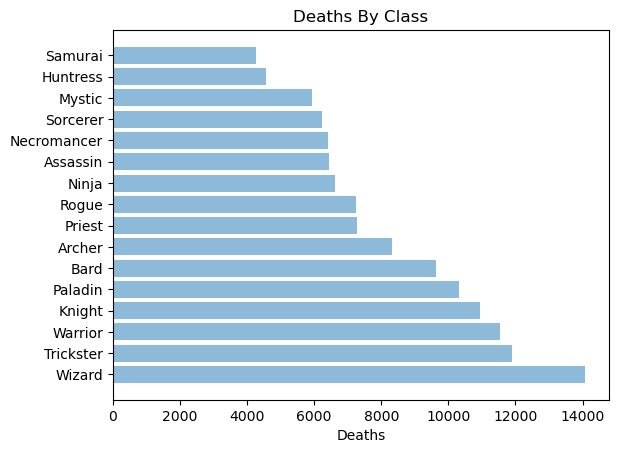

In [29]:
objects = ("Wizard","Trickster","Warrior","Knight","Paladin","Bard","Archer","Priest","Rogue","Ninja","Assassin","Necromancer","Sorcerer","Mystic","Huntress","Samurai")
y_pos = np.arange(len(objects))
deaths = [14084,11895,11549,10937,10305,9644,8305,7264,7243,6605,6426,6409,6240,5948,4566,4252]

plt.barh(y_pos, deaths, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths')
plt.title('Deaths By Class')

plt.show()

### Conclusion:

   ##### Which enemies caused the most deaths?
   We can see that the bulk of deaths is caused by gods in the godlands and in battles with oryx and his subordinates.
   ##### What dates do people die on the most?
   Deaths are more frequent earlier in the week, i.e: Monday-Wednesday and appears to show an overall decrease as the week      progresses.
   ##### What day of the week has the most deaths?
   Tuesday
   ##### How many ring of decades have been lost?
   7130
   #####  What are among the highest amounts of base and total fame people die with?
   The top 10 highest base fame on death ranges from 163583-403648, and the top 10 highest total fame on death wherein the      base fame is multiplied by bonuses ranges from 425343-2519464
   ##### Are deaths higher amongst those who wear backpacks or don't?
   Deaths almost double with backpack-free users
   ##### Does the tier of your weapon, secondary and armour have any correlation with reduced deaths?
   The highest deaths occur with gearless players and players wearing the highest tiers of armor between 12-14
   ##### Which classes are dying the most?
   We see that the most frequent deaths occur with the Wizard class. Trickstersm, Warriors, Knights and Paladins closely        follow.
